### Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives us information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 

Based on these features, we have to predict if an arbitrary passenger on Titanic would survive the sinking or not.


#### Importing the required libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

#### Loding the dataset

In [2]:
# Loding the dataset and printing values of top 5 rows.

df = pd.read_csv('titanic_train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Finding the number of rows and columns in the dataset.

df.shape

(891, 12)

There are 891 rows and 12 column in the dataset including the target column.

In [4]:
# Getting column details.

df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

#### Coulmns Description:

1. PassengerID : This shows the ID number of all the passengers. This is unique for all the passengers.

2. Survived : This shows whether the passenger survived or not. '0' denotes that the passener died and '1' shows the passenger survived.

3. Pclass : This shows the cabin class of the passenger in which he/she was travelling.

4. Name : Shows the names of the passengers.

5. Sex : Shows the geneder of the passengers.

6. Age : Shows the age of the passengers.

7. SibSp : siblings/spouses

8. Parch : Parents/children

9. Ticket : Shows the ticket number of the passengers.

10. Fare : Shows the fare for the tickets in dollar.

11. Cabin : Shows the cabin number of the passengers.

12. Embarked : port of embarkation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset contains 891 rows and 11 feature cloumns + 1 target column (Survived).

- 2 of the features (Age and Fare) are of float datatype.
- 5 are of integer datatype.
- 5 are of object datatype.

###### Getting the description:

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


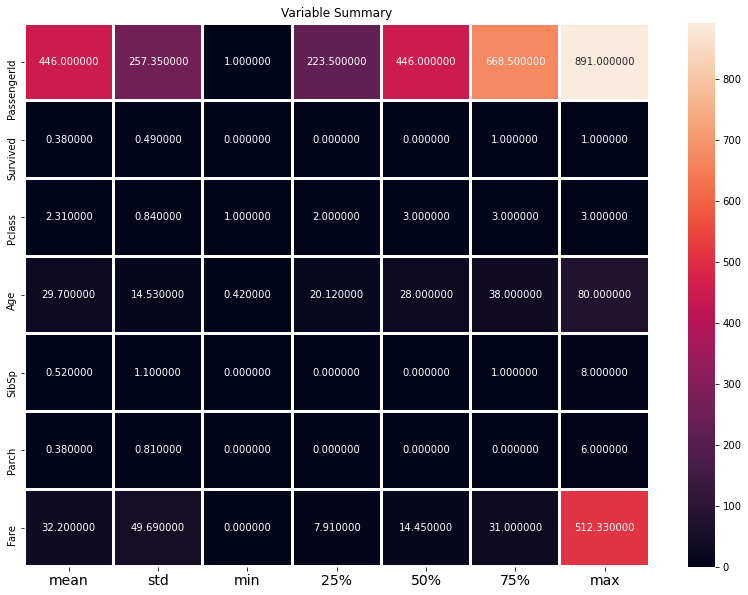

In [7]:
# Plotting heatmap for describe.

plt.figure(figsize=(14,10))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidths=2, annot=True, fmt='f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.title('Variable Summary')
plt.show()

#### Outcomes of description table:

- The dataset contains null values (like Age).

- 38% of passengers survived.

- Passengers age range from 0.4 to 80 years.

#### Correlation:

In [8]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### Correlation using Heatmap

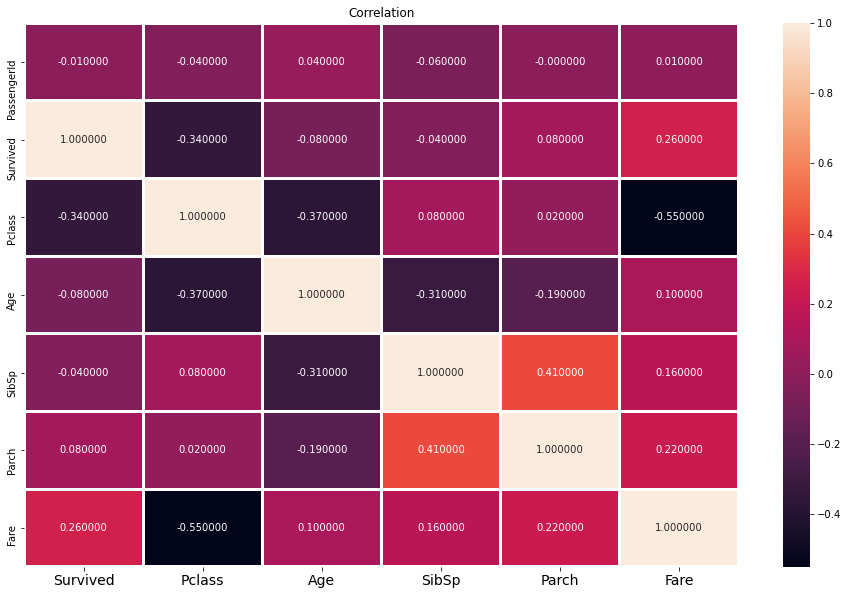

In [9]:
plt.figure(figsize=(16,10))
sns.heatmap(round(df.corr()[1:].transpose(),2), linewidths=2, annot=True, fmt='f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.title('Correlation')
plt.show()

In [10]:
corr_matrix = df.corr()
corr_matrix["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

#### Outcome of Correlation table:

Fare have 25% of correlation with the target column which can be considered as strong bond. Parch have 8% correlation with the target column.

- Maximum correlation is with Fare (25%)
- Minimum correlation is with Pclass (-33%)

#### Checking for the null values:

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The dataset contains null values as said earlier.

- Age feature have 177 null values.
- Embarked feature hace only 2 null values.
- Cabin feature have 687 null values. We may require to drop the cabin feature column from the dataset because maximum values are null.

#### Checking for the balance of target column.

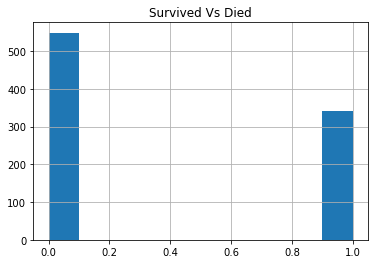

In [70]:
df['Survived'].hist(grid=True)
plt.title('Survived Vs Died')
plt.show()

###### The above graph shows that the data is imbalanced.

#### Comparing the features to check which feature is contributing more in survival.

###### 1. Age and Sex:

Text(0.5, 1.0, 'Male')

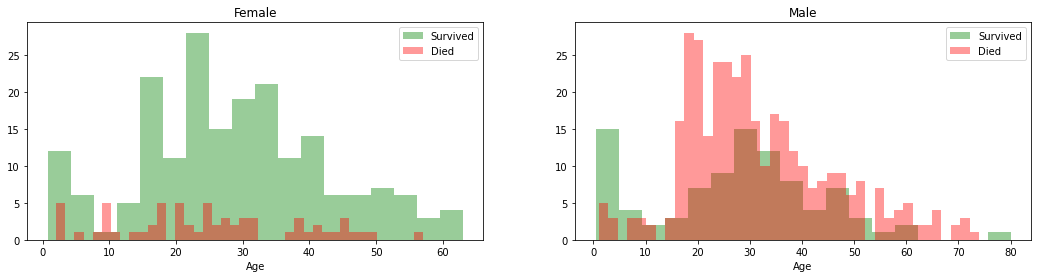

In [12]:
survived = 'Survived'
not_survived = 'Died'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color='g')
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color='r')
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color='g')
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color='r')
ax.legend()
ax.set_title('Male')


The above graphs show that:

1. The women between the age of 15 to 42 have higher chance of survival.
2. The men between the age of 18 to 35 have higher chance of survival.
3. Infants have higher rate of survival.
4. Women survival rate is higher than the men.
5. In men the survival rate between the age of 5 to 18, the survival rate is very low.

2. Pclass:

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

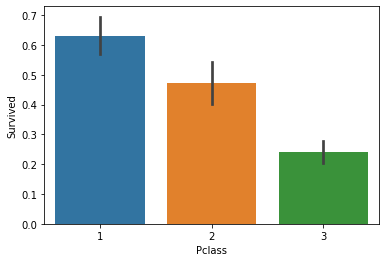

In [13]:
sns.barplot(x='Pclass', y='Survived', data=df)

The above graph says that Passenger class have good relation with the passenger survival. 
- Passengers travelling in the class 1 have higher chance of survival.
- Passengers travelling in the class 3 have least chance of survival.

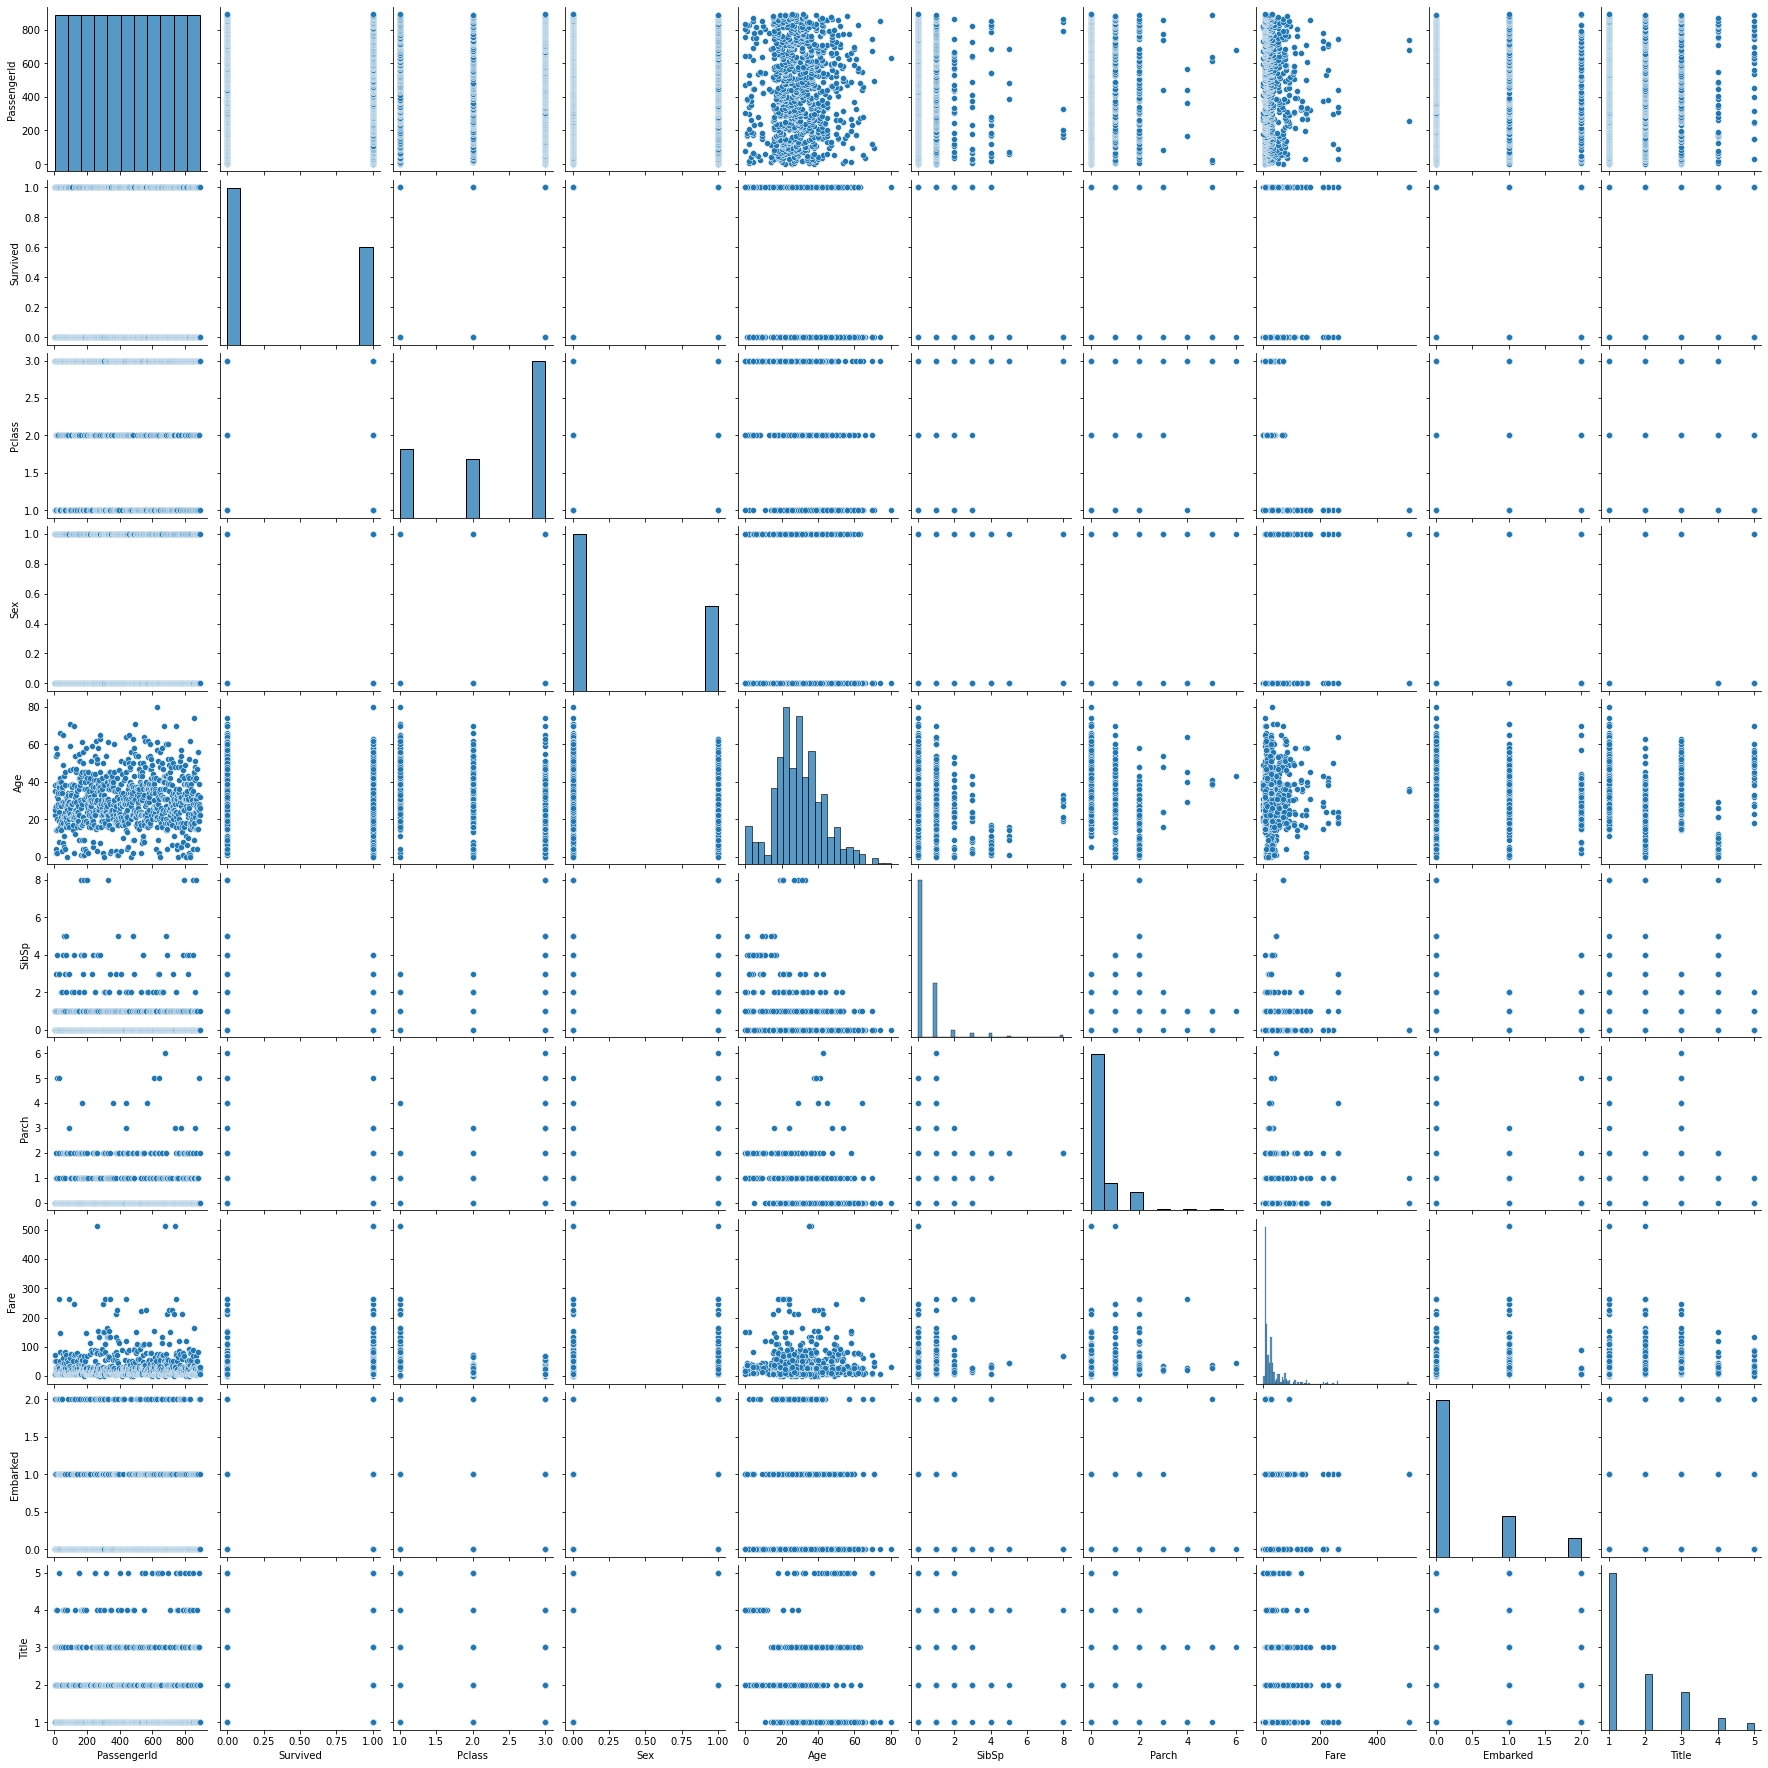

In [42]:
sns.pairplot(df)
plt.show()

#### Handling the missing values:

1. Age:

In [14]:
data = [df]

for dataset in data:
    mean = df['Age'].mean()
    std = df['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    
    rand_age = np.random.randint(mean-std, mean+std, size=is_null)
    
    #Filling the NaN with random values generated.
    age_new = dataset['Age'].copy()
    age_new[np.isnan(age_new)]= rand_age
    dataset['Age'] = age_new
    dataset['Age'] = df['Age'].astype(int)
    
#Checking for the NaN values.
df['Age'].isnull().sum()

0

2. Embarked:

There are only 2 NaN values in the Embarked column. So, we'll check for the most common value and replace the NaN with the most column values.

In [16]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [26]:
common_value = 'S'
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    
#Checking for the NaN values.
df['Embarked'].isnull().sum()

0

3. Cabin

We're dropping cabin column as it have many NaN values.

In [27]:
df.drop('Cabin', axis = 1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,22,1,0,A/5 21171,7,S,1
1,2,1,1,1,38,1,0,PC 17599,71,C,3
2,3,1,3,1,26,0,0,STON/O2. 3101282,7,S,2
3,4,1,1,1,35,1,0,113803,53,S,3
4,5,0,3,0,35,0,0,373450,8,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,211536,13,S,5
887,888,1,1,1,19,0,0,112053,30,S,2
888,889,0,3,1,22,1,2,W./C. 6607,23,S,2
889,890,1,1,0,26,0,0,111369,30,C,1


#### Converting the features:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Sex          891 non-null    int64 
 4   Age          891 non-null    int32 
 5   SibSp        891 non-null    int64 
 6   Parch        891 non-null    int64 
 7   Ticket       891 non-null    object
 8   Fare         891 non-null    int32 
 9   Cabin        204 non-null    object
 10  Embarked     891 non-null    object
 11  Title        891 non-null    int64 
dtypes: int32(2), int64(7), object(3)
memory usage: 76.7+ KB


- Fare having float datatype.
- Categorical features: Name, Sex, Ticket, Cabin, Embarked

1. Fare

In [19]:
data = [df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    
df['Fare'].dtype

dtype('int32')

2. Name

In [20]:
data = [df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
df = df.drop(['Name'], axis=1)

3. Sex:

In [21]:
genders = {'male': 0, 'female':1}
data = [df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

4. Ticket:

In [22]:
df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

Since ticket column have 681 unique results so we'll drop this column.

In [23]:
df.drop('Ticket', axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,22,1,0,7,NaN,S,1
1,2,1,1,1,38,1,0,71,C85,C,3
2,3,1,3,1,26,0,0,7,NaN,S,2
3,4,1,1,1,35,1,0,53,C123,S,3
4,5,0,3,0,35,0,0,8,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13,NaN,S,5
887,888,1,1,1,19,0,0,30,B42,S,2
888,889,0,3,1,22,1,2,23,NaN,S,2
889,890,1,1,0,26,0,0,30,C148,C,1


5. Embarket:

In [30]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
# Converting Embarked into numeric values:
ports = {'S':0, 'C':1, 'Q':2}

data = [df]
for d in data:
    d['Embarked'] = d['Embarked'].map(ports)

#### Checking for outliers and skewness

In [54]:
# Splitting the data in independent and target variable.

x = df.drop(['Survived','Ticket','Cabin'],axis=1)
y = df['Survived']

In [56]:
#Checking for skewness

x.skew()

PassengerId    0.000000
Pclass        -0.630548
Sex            0.618921
Age            0.387847
SibSp          3.695352
Parch          2.749117
Fare           4.786430
Embarked       1.543397
Title          1.377974
dtype: float64

#### Outcome of Skewness:

Skewness threshold is taken as +/-0.5. Columns having shewness:

1. Pclass
2. Sex
3. SibSp (very high)
4. Parch (high)
5. Fare (very high)
6. Embarked (high)
7. Title (high)

#### Remove the skewness:

We're using power_transform function to remove skewness from the dataset.

In [57]:
from sklearn.preprocessing import power_transform

df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns=x.columns)

df_new.skew()

PassengerId   -0.283201
Pclass        -0.441438
Sex            0.618921
Age            0.010215
SibSp          0.808608
Parch          1.228795
Fare          -0.036505
Embarked       1.013716
Title          0.459527
dtype: float64

#### Checking for Outliers

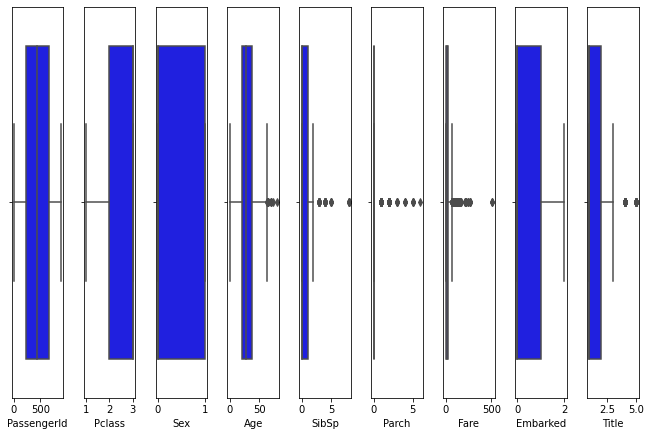

In [60]:
column_list = x.columns.values
n_col = 60
n_rows = 30
plt.figure(figsize=(n_col,3*n_col))
for i in range (0, len(column_list)):
    plt.subplot(n_rows, n_col, i+1)
    sns.boxplot(x[column_list[i]], color = 'blue', orient='V')
    plt.tight_layout()

From the above boxplot we can say that outliers are present in the dataset.

- There are few outliers present.

- Columns PassengerId, Pclass, Sex, Embarked does not contain any ooutliers.

- Columns Title, SibSp, and Age have very few outliers.

- Columns Fare and Parch have more outliers.

#### Removing outliers from the dataset:

Z-Score Technique:

In [62]:
from scipy.stats import zscore
z = np.abs(zscore(x))
z.shape

(891, 9)

In [63]:
thresholds = 3
print(np.where(z>3))


(array([ 13,  16,  25,  27,  30,  50,  59,  68,  71,  86,  88,  96, 118,
       119, 149, 150, 159, 164, 167, 171, 180, 182, 201, 233, 245, 249,
       258, 261, 266, 278, 299, 311, 317, 324, 341, 360, 377, 380, 386,
       398, 437, 438, 438, 449, 480, 493, 527, 536, 541, 542, 556, 557,
       567, 599, 610, 626, 630, 632, 638, 647, 660, 678, 679, 683, 686,
       689, 694, 700, 716, 730, 736, 737, 742, 745, 759, 766, 774, 779,
       787, 792, 796, 813, 822, 824, 846, 848, 850, 851, 858, 863, 885,
       886], dtype=int64), array([5, 4, 5, 6, 8, 4, 4, 4, 4, 5, 6, 3, 6, 4, 8, 8, 4, 4, 5, 4, 4, 4,
       4, 4, 8, 8, 6, 4, 4, 4, 6, 6, 8, 4, 6, 5, 6, 6, 4, 8, 5, 5, 6, 8,
       4, 3, 6, 8, 4, 4, 8, 6, 5, 8, 5, 8, 3, 8, 5, 8, 8, 5, 6, 4, 4, 6,
       8, 6, 6, 6, 5, 6, 6, 8, 8, 8, 5, 6, 4, 4, 8, 4, 8, 4, 4, 8, 4, 3,
       5, 4, 5, 8], dtype=int64))


In [65]:
x_new = x[(z<3).all(axis=1)]
print(x.shape)
print(x_new.shape)

(891, 9)
(800, 9)


#### Calculating percentage of data lost:

In [66]:
loss_percentage=(891-800)/891*100
print(loss_percentage)

10.21324354657688


#### Scaleing the feature columns.

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.73010796,  0.82737724, -0.73769513, ..., -0.49894756,
        -0.56883712, -0.7075504 ],
       [-1.72622007, -1.56610693,  1.35557354, ...,  0.78940535,
         1.00518113,  1.2352151 ],
       [-1.72233219,  0.82737724,  1.35557354, ..., -0.49894756,
        -0.56883712,  0.26383235],
       ...,
       [ 1.72233219,  0.82737724,  1.35557354, ..., -0.17685933,
        -0.56883712,  0.26383235],
       [ 1.72622007, -1.56610693, -0.73769513, ..., -0.03594573,
         1.00518113, -0.7075504 ],
       [ 1.73010796,  0.82737724, -0.73769513, ..., -0.49894756,
         2.57919938, -0.7075504 ]])

#### Handling data Imbalance by over sampling

In [71]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)

In [72]:
y_over.value_counts()

1    549
0    549
Name: Survived, dtype: int64

#### Finding best random state

In [103]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.8303030303030303  on Random_State  38


We found that the best random_state value is 38. We'll create train_test split at random state = 38

#### Creating train_test Split

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state=38)

In [105]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8303030303030303
[[140  18]
 [ 38 134]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       158
           1       0.88      0.78      0.83       172

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.84      0.83      0.83       330



From LogisticRegression we're getting 83% accuracy.

In [106]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predrf = RF.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.8575757575757575
[[139  19]
 [ 28 144]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       158
           1       0.88      0.84      0.86       172

    accuracy                           0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.86      0.86      0.86       330



From RandomForest we're getting 86% accuracy score

In [107]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.7757575757575758
[[126  32]
 [ 42 130]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       158
           1       0.80      0.76      0.78       172

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.78      0.78      0.78       330



From DecisionTreeClassifier we're getting 78% accuracy score.

In [108]:
#SVC

from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test, predsv))

0.8393939393939394
[[142  16]
 [ 37 135]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       158
           1       0.89      0.78      0.84       172

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.85      0.84      0.84       330



From SVC we're getting 84% accuracy score.

#### Selecting the best model

Checking for cross validation score

In [109]:
#Checking cross validation score of LogisticRegression Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for LogisticRegression is ',scr.mean())

Cross validation score for LogisticRegression is  0.8080723118448307


In [110]:
# Checking cross validation score of RandomForest Classifier:

scr = cross_val_score(RF,x,y,cv=5)
print('Cross validation score for RandomForest is', scr.mean())

Cross validation score for RandomForest is 0.791369028937292


In [111]:
# Checking cross validation score of DecisionTree Classifier:
scr = cross_val_score(dt,x,y,cv=5)
print('Cross validation score for DecisionTree is ', scr.mean())

Cross validation score for DecisionTree is  0.7341409829891407


In [112]:
# Checking cross validation score of SVC:

scr = cross_val_score(svc,x,y,cv=5)
print('Cross validation score for SVC is', scr.mean())

Cross validation score for SVC is 0.8215366267026551


#### Best Model:

Minimum difference for model accuracy and cross validation score is for SVC (1.78). So the best model is SVC.

#### Hyper parameter tuning

In [90]:
from sklearn.model_selection import GridSearchCV

In [113]:
# SVC
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [118]:
GCV=GridSearchCV(SVC(),parameters,refit = True, verbose = 3)

In [119]:
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.695 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.604 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.753 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.725 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [120]:
# Finding the best parameter found by GridSearchCV

GCV.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [121]:
# Printing how the model looks like after hyper-parameter tuning

GCV.best_estimator_

SVC(C=1, gamma=0.1)

In [123]:
mod = GCV.predict(x_test)

print(classification_report(y_test, mod))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       158
           1       0.89      0.78      0.84       172

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.85      0.84      0.84       330



After hyper parameter tuning we got approx 84% accuracy

#### Saving the model

In [134]:
import joblib
joblib.dump(mod,"titanic_project.pkl")

['titanic_project.pkl']